In [39]:
from keras.models import load_model

encoder_model = load_model("/content/latest_latest.h5")
encoder_model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)                 │ (None, 1, 1412)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 1412)             │       1,995,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 1024)             │       1,446,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 512)              │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 256)              │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1, 64)               │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,139,348 (15.79 MB)

 Trainable params: 4,139,348 (15.79 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/aug_weathered_5plastics_baselineCorr.csv')

In [41]:
data

,filename,plastic,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,wea-100.txt,PET,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,wea-100.txt,PET,29.999536,42.213728,35.249841,51.735067,35.016284,55.064513,42.608214,41.840817,...,-27.996122,9.801231,-9.373153,-41.172865,-25.466052,-23.123276,-90.706927,-86.423906,-61.914312,-9.869929
2,wea-100.txt,PET,39.329251,39.031658,31.673667,45.005801,37.042937,54.606790,42.861014,44.276963,...,-17.436543,-1.728467,4.133912,-43.579183,-24.150868,-28.465674,-73.843070,-68.029464,-64.466839,-24.398344
3,wea-100.txt,PET,39.420711,41.675967,39.194583,41.131913,36.278642,55.411802,44.339141,41.324296,...,-16.819405,2.358965,9.225311,-38.736534,-29.546008,-8.286694,-77.135276,-77.191407,-73.175284,-19.427360
4,wea-100.txt,PET,40.123708,42.377817,31.372748,47.216699,35.103545,65.440754,48.422044,44.204533,...,-24.556585,2.876364,-8.102570,-42.578375,-25.225534,-22.134593,-69.120372,-72.077336,-79.238890,-30.568327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,wea-95.txt,PE,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
331,wea-96.txt,PE,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
332,wea-97.txt,PE,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
333,wea-98.txt,PE,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


In [42]:
data['plastic'].value_counts()

,count
plastic,
PE,72
PA,72
PET,70
PVC,70
PP,51


In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1

remove_classes = ["PS", "PC", "NC", "/", "ABS"]
# Filter out rows where 'Plastic' is in remove_classes
data = data[~data['plastic'].isin(remove_classes)]

print(data.shape)

wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:]

(335, 1414)


In [44]:
wave_numbers

Index(['200.4755491', '203.3592491', '206.2419365', '209.1236123',
       '212.0042772', '214.8839322', '217.7625781', '220.6402157',
       '223.516846', '226.3924697',
       ...
       '3478.749316', '3480.652831', '3482.555849', '3484.458372', '3486.3604',
       '3488.261932', '3490.16297', '3492.063513', '3493.963561',
       '3495.863115'],
      dtype='object', length=1412)

In [45]:
spectra

,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,223.516846,226.3924697,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,53.417155,55.389242,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,29.999536,42.213728,35.249841,51.735067,35.016284,55.064513,42.608214,41.840817,56.638773,51.611750,...,-27.996122,9.801231,-9.373153,-41.172865,-25.466052,-23.123276,-90.706927,-86.423906,-61.914312,-9.869929
2,39.329251,39.031658,31.673667,45.005801,37.042937,54.606790,42.861014,44.276963,50.278101,51.678020,...,-17.436543,-1.728467,4.133912,-43.579183,-24.150868,-28.465674,-73.843070,-68.029464,-64.466839,-24.398344
3,39.420711,41.675967,39.194583,41.131913,36.278642,55.411802,44.339141,41.324296,55.242926,60.135733,...,-16.819405,2.358965,9.225311,-38.736534,-29.546008,-8.286694,-77.135276,-77.191407,-73.175284,-19.427360
4,40.123708,42.377817,31.372748,47.216699,35.103545,65.440754,48.422044,44.204533,49.420870,52.962037,...,-24.556585,2.876364,-8.102570,-42.578375,-25.225534,-22.134593,-69.120372,-72.077336,-79.238890,-30.568327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,1307.832966,1299.436082,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
331,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,147.411489,152.965406,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
332,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,659.643150,653.614223,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
333,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,1369.239793,1383.927466,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


In [46]:
data

,filename,plastic,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,wea-100.txt,PET,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,wea-100.txt,PET,29.999536,42.213728,35.249841,51.735067,35.016284,55.064513,42.608214,41.840817,...,-27.996122,9.801231,-9.373153,-41.172865,-25.466052,-23.123276,-90.706927,-86.423906,-61.914312,-9.869929
2,wea-100.txt,PET,39.329251,39.031658,31.673667,45.005801,37.042937,54.606790,42.861014,44.276963,...,-17.436543,-1.728467,4.133912,-43.579183,-24.150868,-28.465674,-73.843070,-68.029464,-64.466839,-24.398344
3,wea-100.txt,PET,39.420711,41.675967,39.194583,41.131913,36.278642,55.411802,44.339141,41.324296,...,-16.819405,2.358965,9.225311,-38.736534,-29.546008,-8.286694,-77.135276,-77.191407,-73.175284,-19.427360
4,wea-100.txt,PET,40.123708,42.377817,31.372748,47.216699,35.103545,65.440754,48.422044,44.204533,...,-24.556585,2.876364,-8.102570,-42.578375,-25.225534,-22.134593,-69.120372,-72.077336,-79.238890,-30.568327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,wea-95.txt,PE,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
331,wea-96.txt,PE,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
332,wea-97.txt,PE,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
333,wea-98.txt,PE,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


In [47]:
all_data = []
for col in range (len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    # Read the file assuming space-separated values
    temp = y.reshape(-1, 1)

    # Normalize between 0 and 1
    temp = scaler.fit_transform(temp)

    # Flatten to 1D and store
    temp = temp.reshape(1, -1)

      # Append to the list
    all_data.append(temp)

In [48]:
all_data

[array([[0.03351478, 0.0341512 , 0.03372194, ..., 0.00040705, 0.00407947,
         0.01797533]]),
 array([[0.03417389, 0.03763191, 0.03566033, ..., 0.00121259, 0.00815164,
         0.02288622]]),
 array([[0.03200887, 0.0319247 , 0.02984362, ..., 0.00164428, 0.00265191,
         0.0139846 ]]),
 array([[0.03294841, 0.03358562, 0.03288451, ..., 0.        , 0.00113474,
         0.01632106]]),
 array([[0.03384534, 0.0344845 , 0.031364  , ..., 0.00203066, 0.        ,
         0.01380057]]),
 array([[0.03605976, 0.03725141, 0.03846161, ..., 0.00231754, 0.01216914,
         0.02604905]]),
 array([[0.03351677, 0.03511305, 0.03372357, ..., 0.        , 0.00789611,
         0.02166447]]),
 array([[0.28219613, 0.28509997, 0.28527037, ..., 0.37818623, 0.40013024,
         0.41563028]]),
 array([[0.13603765, 0.13535179, 0.13094947, ..., 0.00745721, 0.02114731,
         0.03324348]]),
 array([[0.13686298, 0.13149486, 0.12802358, ..., 0.        , 0.01496493,
         0.02276105]]),
 array([[0.13843843,

In [49]:
y.shape

(1412,)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [51]:
labels = data['plastic'].astype(str)

In [52]:
labels

,plastic
0,PET
1,PET
2,PET
3,PET
4,PET
...,...
330,PE
331,PE
332,PE
333,PE


In [53]:
X =  np.array(all_data)
y = encoder.fit_transform(labels)

In [54]:
X.shape

(335, 1, 1412)

In [55]:
X

array([[[3.35147826e-02, 3.41511997e-02, 3.37219376e-02, ...,
         4.07047673e-04, 4.07946501e-03, 1.79753305e-02]],

       [[3.41738854e-02, 3.76319138e-02, 3.56603288e-02, ...,
         1.21258994e-03, 8.15163907e-03, 2.28862169e-02]],

       [[3.20088703e-02, 3.19247014e-02, 2.98436183e-02, ...,
         1.64427967e-03, 2.65190763e-03, 1.39846016e-02]],

       ...,

       [[4.28503104e-01, 4.29511820e-01, 4.32141902e-01, ...,
         1.58283100e-01, 1.80163007e-01, 1.76554902e-01]],

       [[3.73274131e-01, 3.71911494e-01, 3.73295926e-01, ...,
         2.34474281e-01, 2.44375469e-01, 2.27666896e-01]],

       [[7.50546090e-02, 1.02045056e-01, 9.12880279e-02, ...,
         7.03477752e-03, 2.85483789e-02, 4.72656405e-02]]])

In [56]:
y

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,

In [57]:
print(encoder.classes_)

['PA' 'PE' 'PET' 'PP' 'PVC']


# 1. AE

In [58]:
AE_op = encoder_model.predict(X)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [59]:
AE_op.shape

(335, 1, 64)

# 2. PCA

In [60]:
from sklearn.decomposition import PCA
X_pca = X.squeeze(axis=1)

In [61]:
pca = PCA(n_components=16)

In [62]:
X_pca = pca.fit_transform(X_pca)
X_pca.shape

(335, 16)

# 3. LDA

In [63]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming your data X is a NumPy array of shape (1200, 1, 16)
X_AE = np.squeeze(AE_op, axis=1)  # Now X is of shape (1200, 16)

In [64]:
# Initialize LDA with desired number of components; remember that maximum is (n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=3)
# Fit LDA and transform the data
lda_ae = lda.fit_transform(X_AE, y)
print("Shape of AR data after LDA transformation:", lda_ae.shape)

Shape of AR data after LDA transformation: (335, 3)


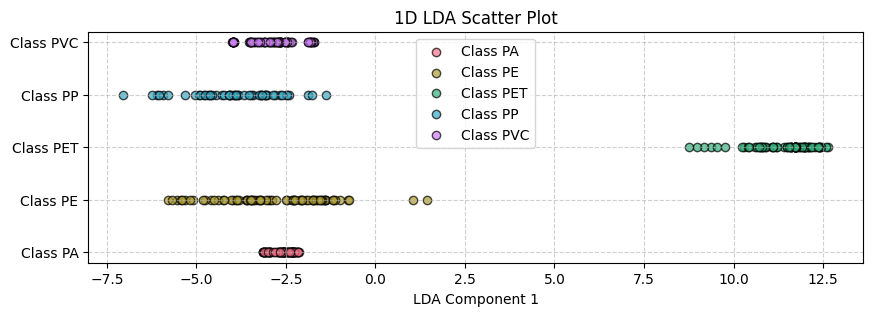

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_lda_1d(lda_transformed, labels):
    """
    Plots 1D LDA transformed data with color-coded classes.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, n_components)
    - labels: class labels (n_samples,)
    """
    if len(lda_transformed.shape) > 1 and lda_transformed.shape[1] > 1:
        lda_transformed = lda_transformed[:, 0]  # Select only the first LDA component

    lda_transformed = lda_transformed.flatten()  # Ensure it's 1D
    unique_labels = np.unique(labels)
    colors = sns.color_palette("husl", len(unique_labels))

    plt.figure(figsize=(10, 3))

    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(lda_transformed[idx], [i] * np.sum(idx),
                    color=colors[i], label=f'Class {label}', alpha=0.7, edgecolors='k')

    plt.xlabel("LDA Component 1")
    plt.yticks(range(len(unique_labels)), [f'Class {l}' for l in unique_labels])  # Label y-axis
    plt.title("1D LDA Scatter Plot")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Example Usage
# Assuming lda_transformed is (1023, 3) and labels is (1023,)
plot_lda_1d(lda_ae, labels)


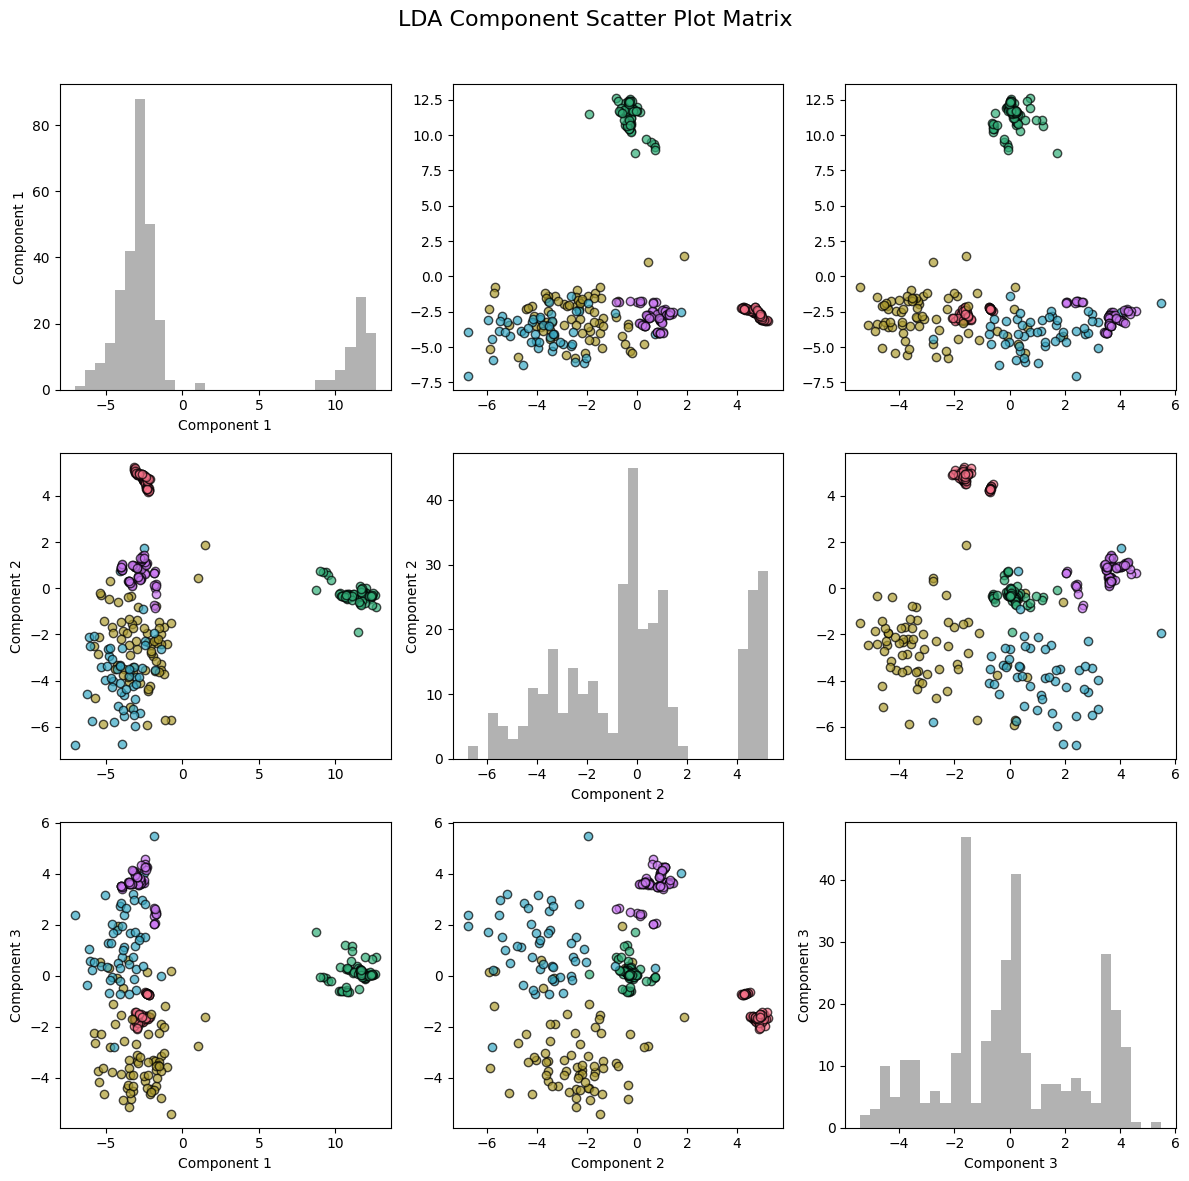

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_lda_components(lda_transformed, labels):
    """
    Plots pairwise scatter plots of LDA components with color-coded classes.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, n_components)
    - labels: class labels (n_samples,)
    """
    n_components = lda_transformed.shape[1]  # Number of LDA components
    unique_labels = np.unique(labels)
    colors = sns.color_palette("husl", len(unique_labels))

    fig, axes = plt.subplots(n_components, n_components, figsize=(4 * n_components, 4 * n_components))

    for i in range(n_components):
        for j in range(n_components):
            ax = axes[i, j]

            if i == j:
                ax.hist(lda_transformed[:, i], bins=30, color='gray', alpha=0.6)
                ax.set_ylabel(f'Component {i+1}')
                ax.set_xlabel(f'Component {j+1}')
            else:
                for k, label in enumerate(unique_labels):
                    idx = labels == label
                    ax.scatter(lda_transformed[idx, j], lda_transformed[idx, i],
                               color=colors[k], label=f'Class {label}', alpha=0.7, edgecolors='k')

            if j == 0:
                ax.set_ylabel(f'Component {i+1}')
            if i == n_components - 1:
                ax.set_xlabel(f'Component {j+1}')

    plt.suptitle("LDA Component Scatter Plot Matrix", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example Usage
# Assuming lda_transformed is (1023, 3) and labels is (1023,)
plot_lda_components(lda_ae, labels)


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans

def plot_lda(lda_transformed, labels, n_components=3):
    """
    Plots LDA transformed data in 2D or 3D and checks clustering.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, 2) or (n_samples, 3)
    - labels: class labels
    - n_components: Number of dimensions (2 or 3)
    """
    unique_labels = np.unique(labels)
    colors = sns.color_palette("husl", len(unique_labels))

    fig = plt.figure(figsize=(8, 6))

    if n_components == 2:
        ax = fig.add_subplot(111)
        for i, label in enumerate(unique_labels):
            idx = labels == label
            ax.scatter(lda_transformed[idx, 0], lda_transformed[idx, 2],
                       color=colors[i], label=f'Class {label}', alpha=0.6, edgecolors='k')
        ax.set_xlabel('LDA Component 1')
        ax.set_ylabel('LDA Component 2')

    elif n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, label in enumerate(unique_labels):
            idx = labels == label
            ax.scatter(lda_transformed[idx, 0], lda_transformed[idx, 1], lda_transformed[idx, 2],
                       color=colors[i], label=f'Class {label}', alpha=0.6, edgecolors='k')
        ax.set_xlabel('LDA Component 1')
        ax.set_ylabel('LDA Component 2')
        ax.set_zlabel('LDA Component 3')

    else:
        raise ValueError("n_components must be 2 or 3")

    plt.legend()
    plt.title("LDA Data Separability Check")
    plt.show()


In [68]:
lda2 = LinearDiscriminantAnalysis(n_components=3)
# Fit LDA and transform the data
lda_pca = lda2.fit_transform(X_pca, y)
print("Shape  of PCA data after LDA transformation:", lda_pca.shape)

Shape  of PCA data after LDA transformation: (335, 3)


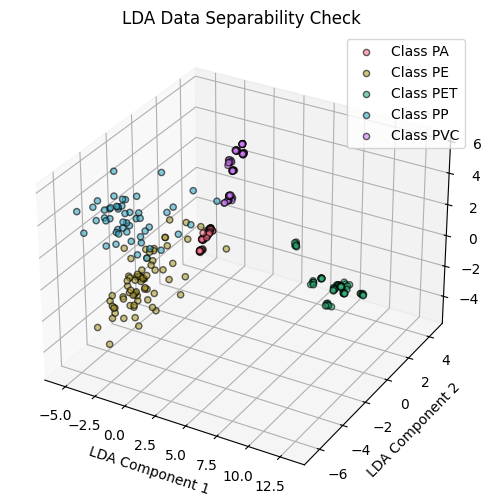

In [69]:
plot_lda(lda_pca, labels, n_components=3)

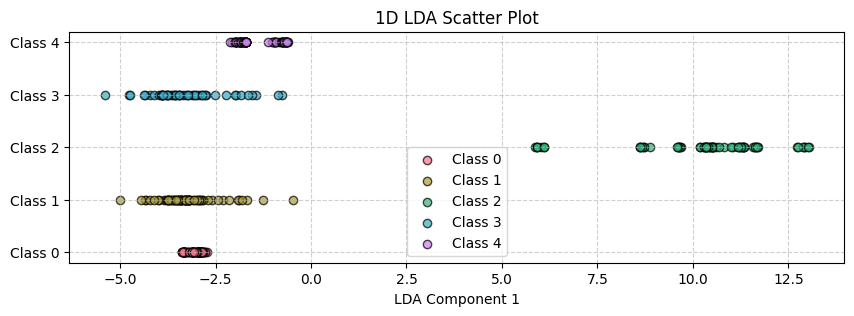

In [70]:
plot_lda_1d(lda_pca,y)

In [71]:
vqc_data = np.concatenate((lda_ae, lda_pca), axis=1)
print("Concatenated vertically:\n", vqc_data.shape)

Concatenated vertically:
 (335, 6)


# 4. VQC

In [72]:
# !pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 120.3 MB/s eta 0:00:00


In [73]:
import torch
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
vqc_data = scaler.fit_transform(vqc_data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vqc_data, y, test_size=0.2, random_state=42,stratify=y)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

In [74]:
import pennylane as qml
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameters
num_qubits = 6       # 6 qubits
num_layers = 2       # Reduced depth for speed
num_classes = 5      # 5-class classification
epochs = 500        # Fewer epochs for faster training
batch_size = 16      # Mini-batch size
learning_rate = 0.01 # Learning rate

# Define Quantum Device (6 qubits)
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Circuit with Optimized Speed
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Faster Encoding: AngleEmbedding (Y rotations)
    qml.AngleEmbedding(inputs, wires=range(num_qubits), rotation="Y")

    # Variational Quantum Circuit (VQC)
    for w in weights:
        for i in range(num_qubits):
            qml.RY(w[i], wires=i)
            qml.RZ(w[i], wires=i)  # Removed RX for speed

        # Star Entanglement: Faster than All-to-All
        for i in range(1, num_qubits):
            qml.CNOT(wires=[0, i])  # Connect all to qubit 0

    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]  # Expectation values

# Define Torch Model with Quantum Layer
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.q_weights = nn.Parameter(0.01 * torch.randn(num_layers, num_qubits))  # Trainable weights
        self.fc = nn.Linear(num_qubits, num_classes)  # Fully connected layer

    def forward(self, x):
        q_out = torch.tensor([quantum_circuit(xi, self.q_weights) for xi in x], dtype=torch.float32)
        return self.fc(q_out)  # Map quantum features to class probabilities

# Initialize Model, Loss, Optimizer
model = QuantumClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)


In [75]:
loss_values = []
accuracy_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    correct = (y_pred.argmax(dim=1) == y_train).sum().item()
    accuracy = correct / len(y_train) * 100

    loss_values.append(loss.item())
    accuracy_values.append(accuracy)

    print(f"Epoch {epoch} | Loss: {loss.item():.4f} | Accuracy: {accuracy:.2f}%")



Epoch 0 | Loss: 1.6886 | Accuracy: 15.30%
Epoch 1 | Loss: 1.6665 | Accuracy: 15.30%
Epoch 2 | Loss: 1.6471 | Accuracy: 15.30%
Epoch 3 | Loss: 1.6305 | Accuracy: 15.30%
Epoch 4 | Loss: 1.6164 | Accuracy: 11.94%
Epoch 5 | Loss: 1.6047 | Accuracy: 20.15%
Epoch 6 | Loss: 1.5951 | Accuracy: 21.64%
Epoch 7 | Loss: 1.5873 | Accuracy: 21.64%
Epoch 8 | Loss: 1.5810 | Accuracy: 21.64%
Epoch 9 | Loss: 1.5757 | Accuracy: 21.64%
Epoch 10 | Loss: 1.5713 | Accuracy: 21.64%
Epoch 11 | Loss: 1.5674 | Accuracy: 21.64%
Epoch 12 | Loss: 1.5639 | Accuracy: 21.64%
Epoch 13 | Loss: 1.5606 | Accuracy: 29.48%
Epoch 14 | Loss: 1.5573 | Accuracy: 42.91%
Epoch 15 | Loss: 1.5540 | Accuracy: 42.91%
Epoch 16 | Loss: 1.5507 | Accuracy: 42.54%
Epoch 17 | Loss: 1.5472 | Accuracy: 42.54%
Epoch 18 | Loss: 1.5436 | Accuracy: 42.54%
Epoch 19 | Loss: 1.5398 | Accuracy: 42.16%
Epoch 20 | Loss: 1.5358 | Accuracy: 42.16%
Epoch 21 | Loss: 1.5317 | Accuracy: 42.16%
Epoch 22 | Loss: 1.5275 | Accuracy: 42.16%
Epoch 23 | Loss: 1.52

In [85]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import pennylane as qml

In [132]:
# from sklearn.metrics import classification_report

# # Evaluate on Test Dataset
# model.eval()  # Set the model to evaluation mode

# # Make predictions on the test dataset
# with torch.no_grad():  # No need to compute gradients for evaluation
#     y_pred_test = model(X_test)  # Get predictions for the test data
#     predicted_labels_test = y_pred_test.argmax(dim=1)  # Get the predicted class labels

#     # Calculate accuracy
#     test_accuracy = (predicted_labels_test == y_test).float().mean().item() * 100
#     print(f"\nFinal Test Accuracy: {test_accuracy:.2f}%")

#     # --- CLASSIFICATION REPORT ---
#     # Generate the classification report
#     print("\nClassification Report on Test Dataset:")
#     print(classification_report(y_test.numpy(), predicted_labels_test.numpy(), target_names=[str(i) for i in range(num_classes)]))


In [131]:
from sklearn.metrics import classification_report

# Evaluate on Test Dataset
model.eval()  # Set the model to evaluation mode

# Make predictions on the test dataset
with torch.no_grad():  # No need to compute gradients for evaluation
    y_pred_test = model(X_test)  # Get predictions for the test data
    predicted_labels_test = y_pred_test.argmax(dim=1)  # Get the predicted class labels

    # Calculate test accuracy
    test_accuracy = (predicted_labels_test == y_test).float().mean().item() * 100

# Print test accuracy in a structured format
print("\n" + "="*70)
print(f"🚀 Final Test Accuracy: {test_accuracy:.2f}%")
print("="*70 + "\n")

# --- CLASSIFICATION REPORT ---
# Convert numerical labels to class names
class_labels = encoder.classes_  # Use actual class names

# Generate classification report
report = classification_report(y_test.numpy(), predicted_labels_test.numpy(),
                               target_names=class_labels, digits=4)

# Print classification report with formatting
print("📌 Classification Report on Test Dataset:")
print("-" * 70)
print(report)
print("-" * 70)



🚀 Final Test Accuracy: 97.01%

📌 Classification Report on Test Dataset:
----------------------------------------------------------------------
              precision    recall  f1-score   support

          PA     1.0000    1.0000    1.0000        15
          PE     0.9333    1.0000    0.9655        14
         PET     1.0000    1.0000    1.0000        14
          PP     1.0000    0.8000    0.8889        10
         PVC     0.9333    1.0000    0.9655        14

    accuracy                         0.9701        67
   macro avg     0.9733    0.9600    0.9640        67
weighted avg     0.9721    0.9701    0.9690        67

----------------------------------------------------------------------


In [128]:
# -------------- TRAINING LOSS VS ACC -----------------------
# import matplotlib.pyplot as plt

# # Create a figure
# plt.figure(figsize=(8, 5))

# # Plot Loss
# plt.plot(loss_values, label="Loss", color="red")

# # Plot Accuracy
# plt.plot(accuracy_values, label="Accuracy", color="blue")

# # Labels & Title
# plt.xlabel("Epochs")
# plt.ylabel("Value")
# plt.title("Training Loss & Accuracy")
# plt.legend()

# # Show plot
# plt.show()


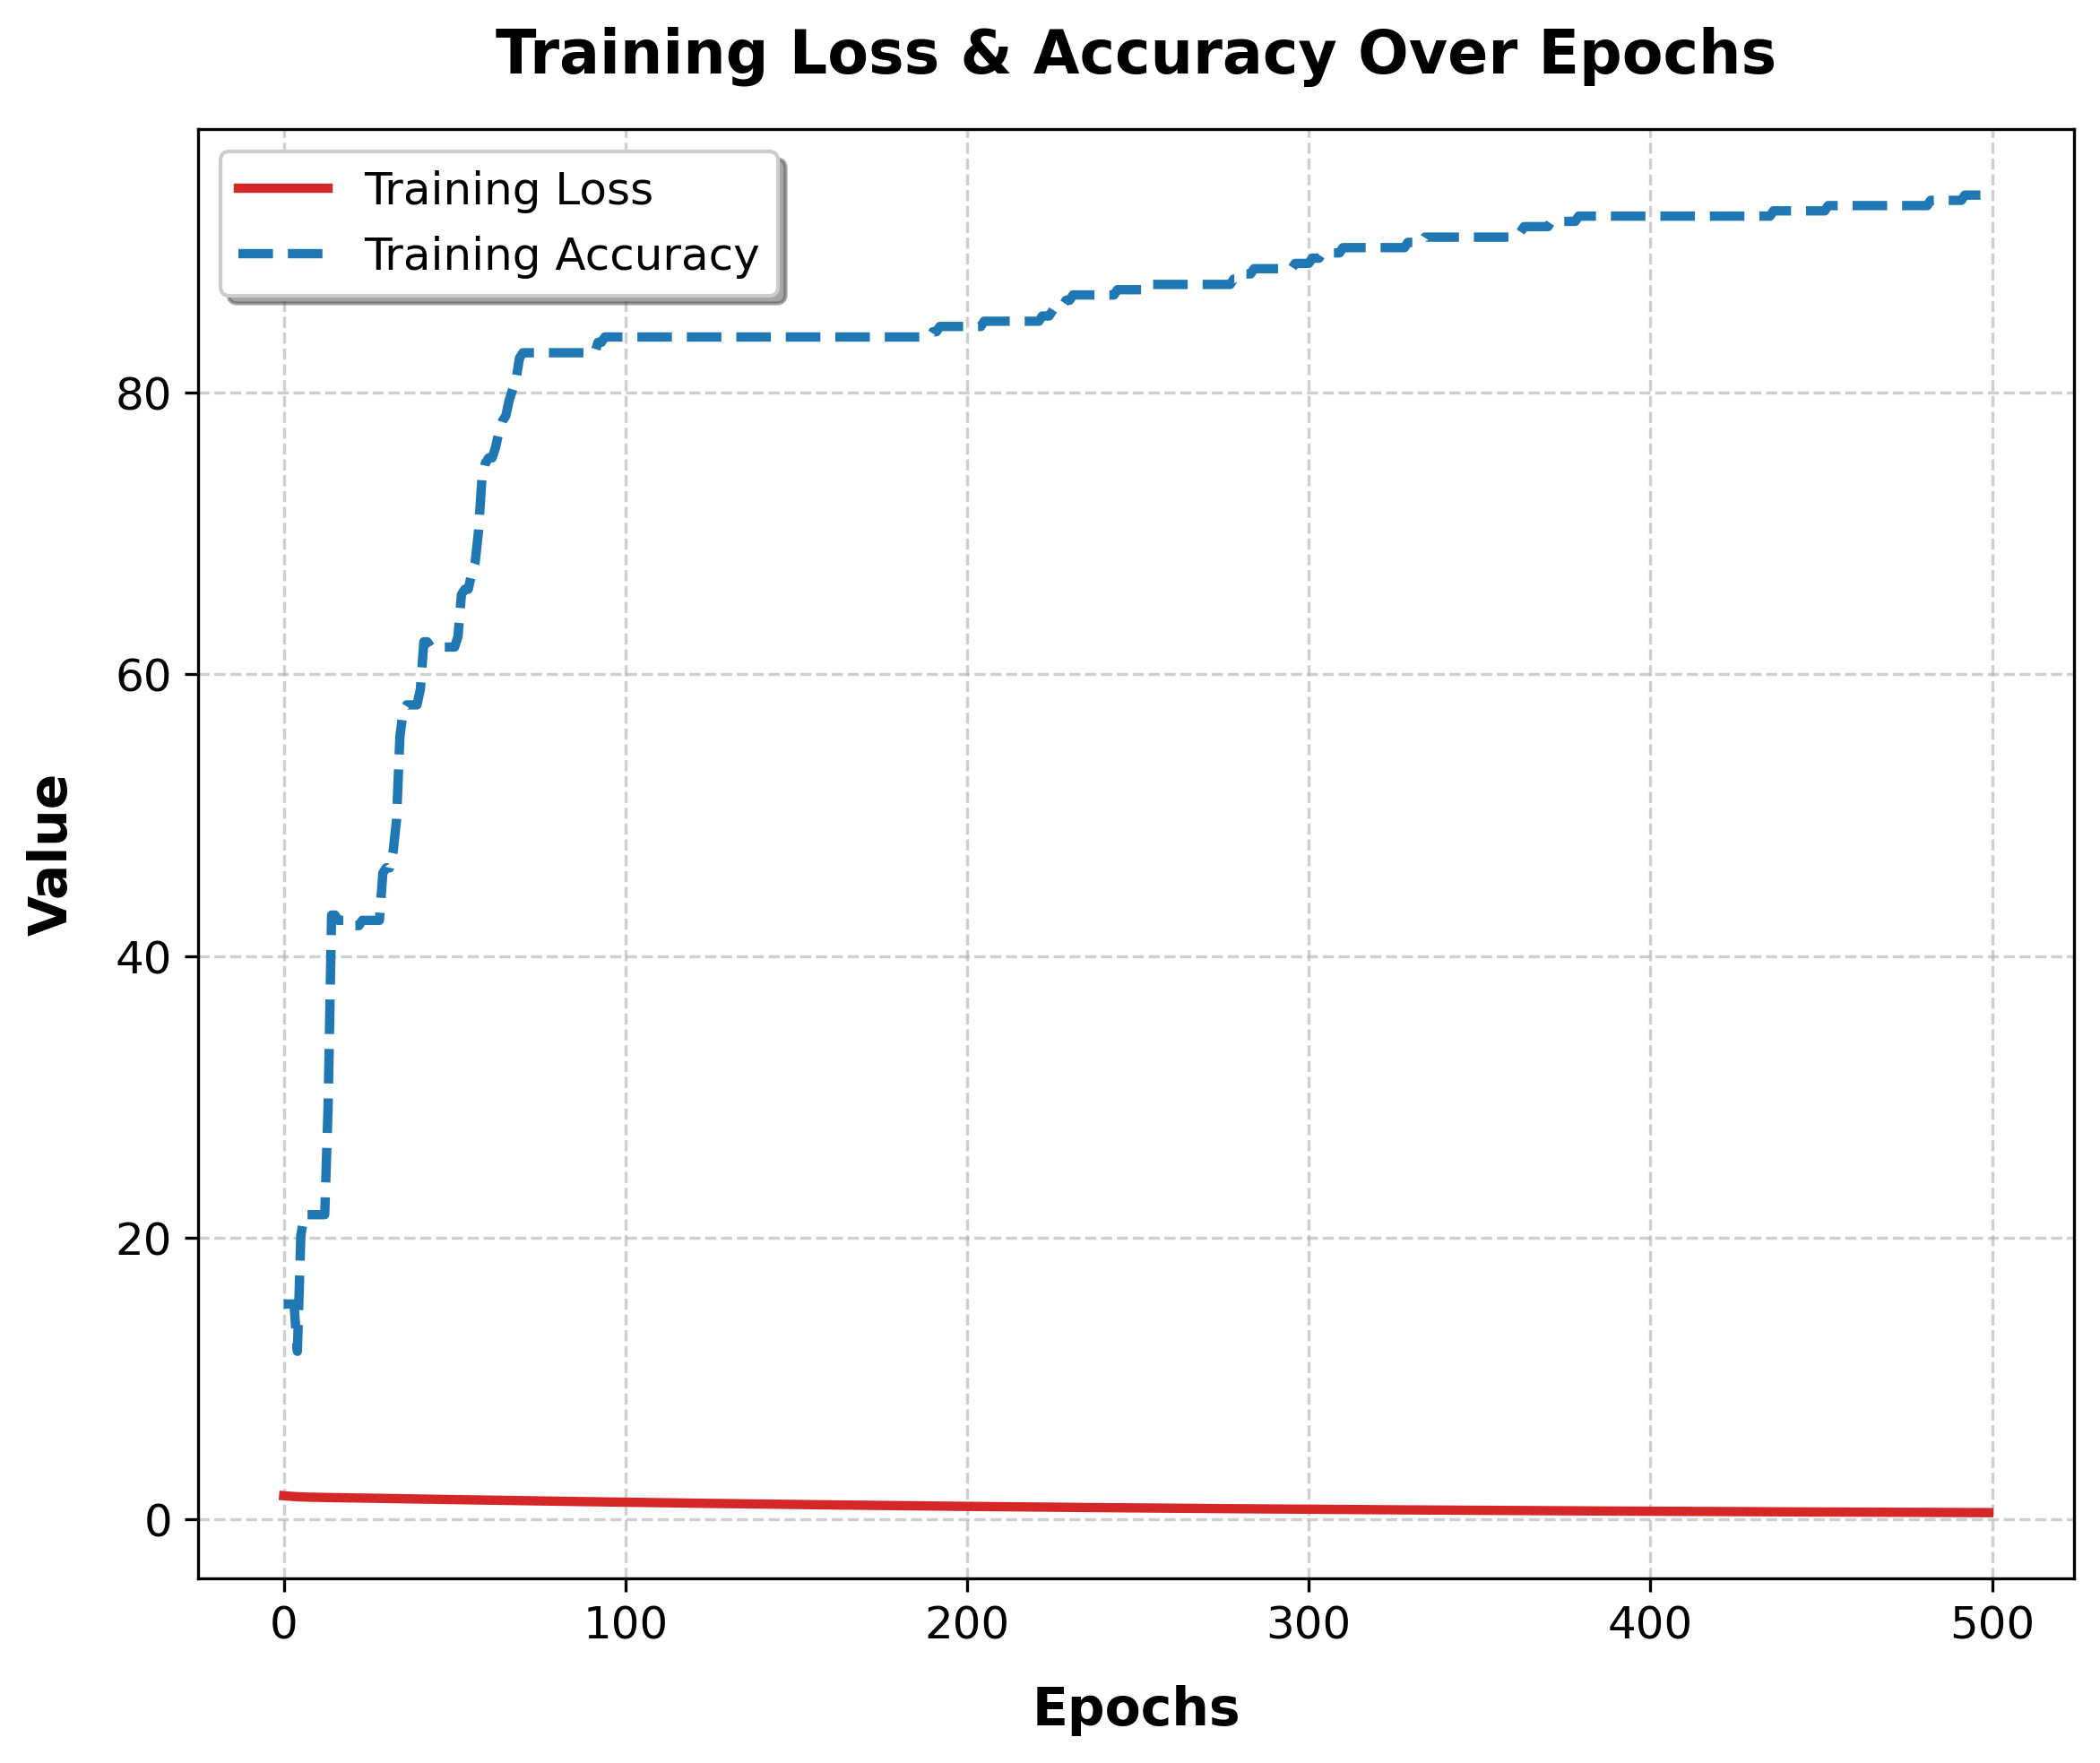

In [127]:
# Create high-resolution figure
plt.figure(figsize=(9, 7), dpi=300)

# Plot Training Loss
plt.plot(loss_values, label="Training Loss", color="#d62728", linewidth=2.5, linestyle="-")

# Plot Training Accuracy
plt.plot(accuracy_values, label="Training Accuracy", color="#1f77b4", linewidth=2.5, linestyle="--")

# Labels & Title
plt.xlabel("Epochs", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Value", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Training Loss & Accuracy Over Epochs", fontsize=16, fontweight="bold", pad=15)

# Customize legend
plt.legend(fontsize=12, loc="best", frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Set tick parameters for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [123]:
# # --- ROC CURVE ---
# from sklearn.preprocessing import label_binarize
# y_test_binarized = label_binarize(y_test.numpy(), classes=np.arange(num_classes))
# y_pred_prob = torch.softmax(y_pred_test, dim=1).numpy()

# plt.figure(figsize=(10, 8))
# for i in range(num_classes):
#     fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# plt.plot([0, 1], [0, 1], "k--")  # Random baseline
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

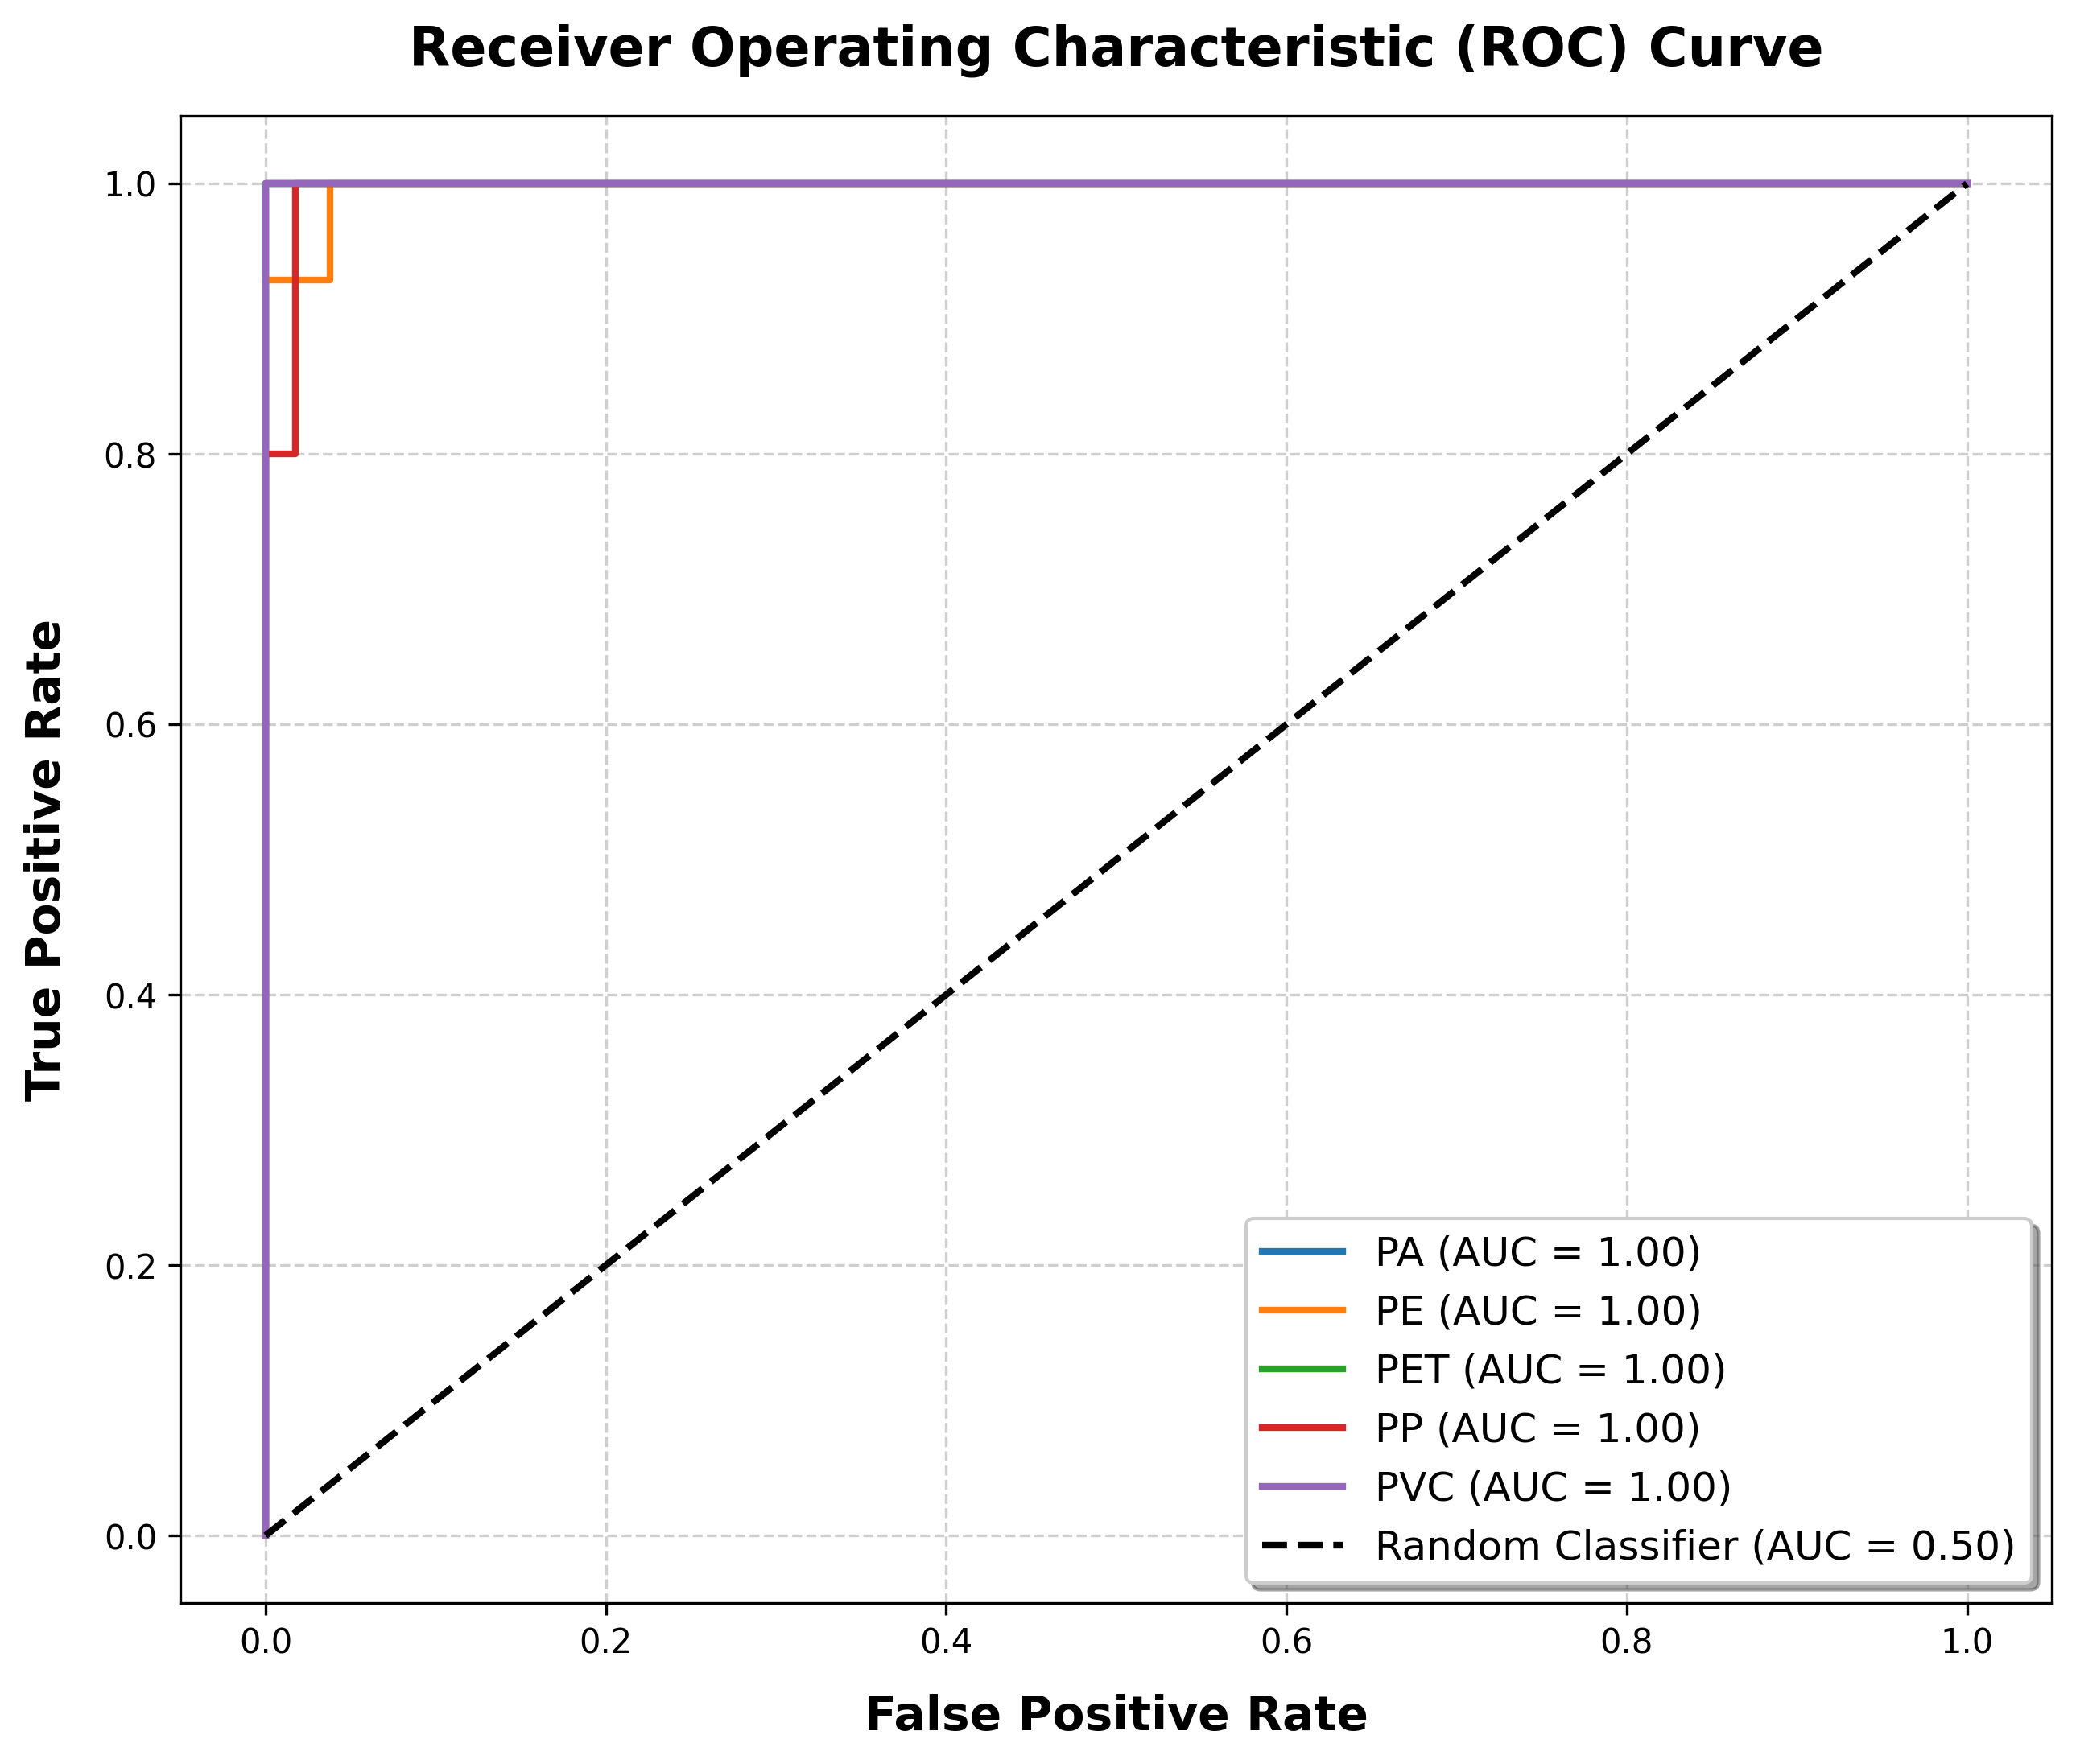

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_binarized = label_binarize(y_test.numpy(), classes=np.arange(num_classes))
y_pred_prob = torch.softmax(y_pred_test, dim=1).numpy()

# Define colors for better distinction
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create a high-resolution figure
plt.figure(figsize=(10, 8), dpi=300)

# Plot ROC curves for each class
for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Classifier (AUC = 0.50)")

# Labels & Title
plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight="bold", pad=15)

# Customize legend
plt.legend(fontsize=12, loc="lower right", frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


In [118]:
# # --- CONFUSION MATRIX ---
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Get class labels from encoder
# class_labels = encoder.classes_

# # Compute Confusion Matrix
# conf_matrix = confusion_matrix(y_test.numpy(), predicted_labels_test.numpy())

# # Plot Confusion Matrix with Labels
# plt.figure(figsize=(12, 10))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma",
#             xticklabels=class_labels, yticklabels=class_labels)

# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()


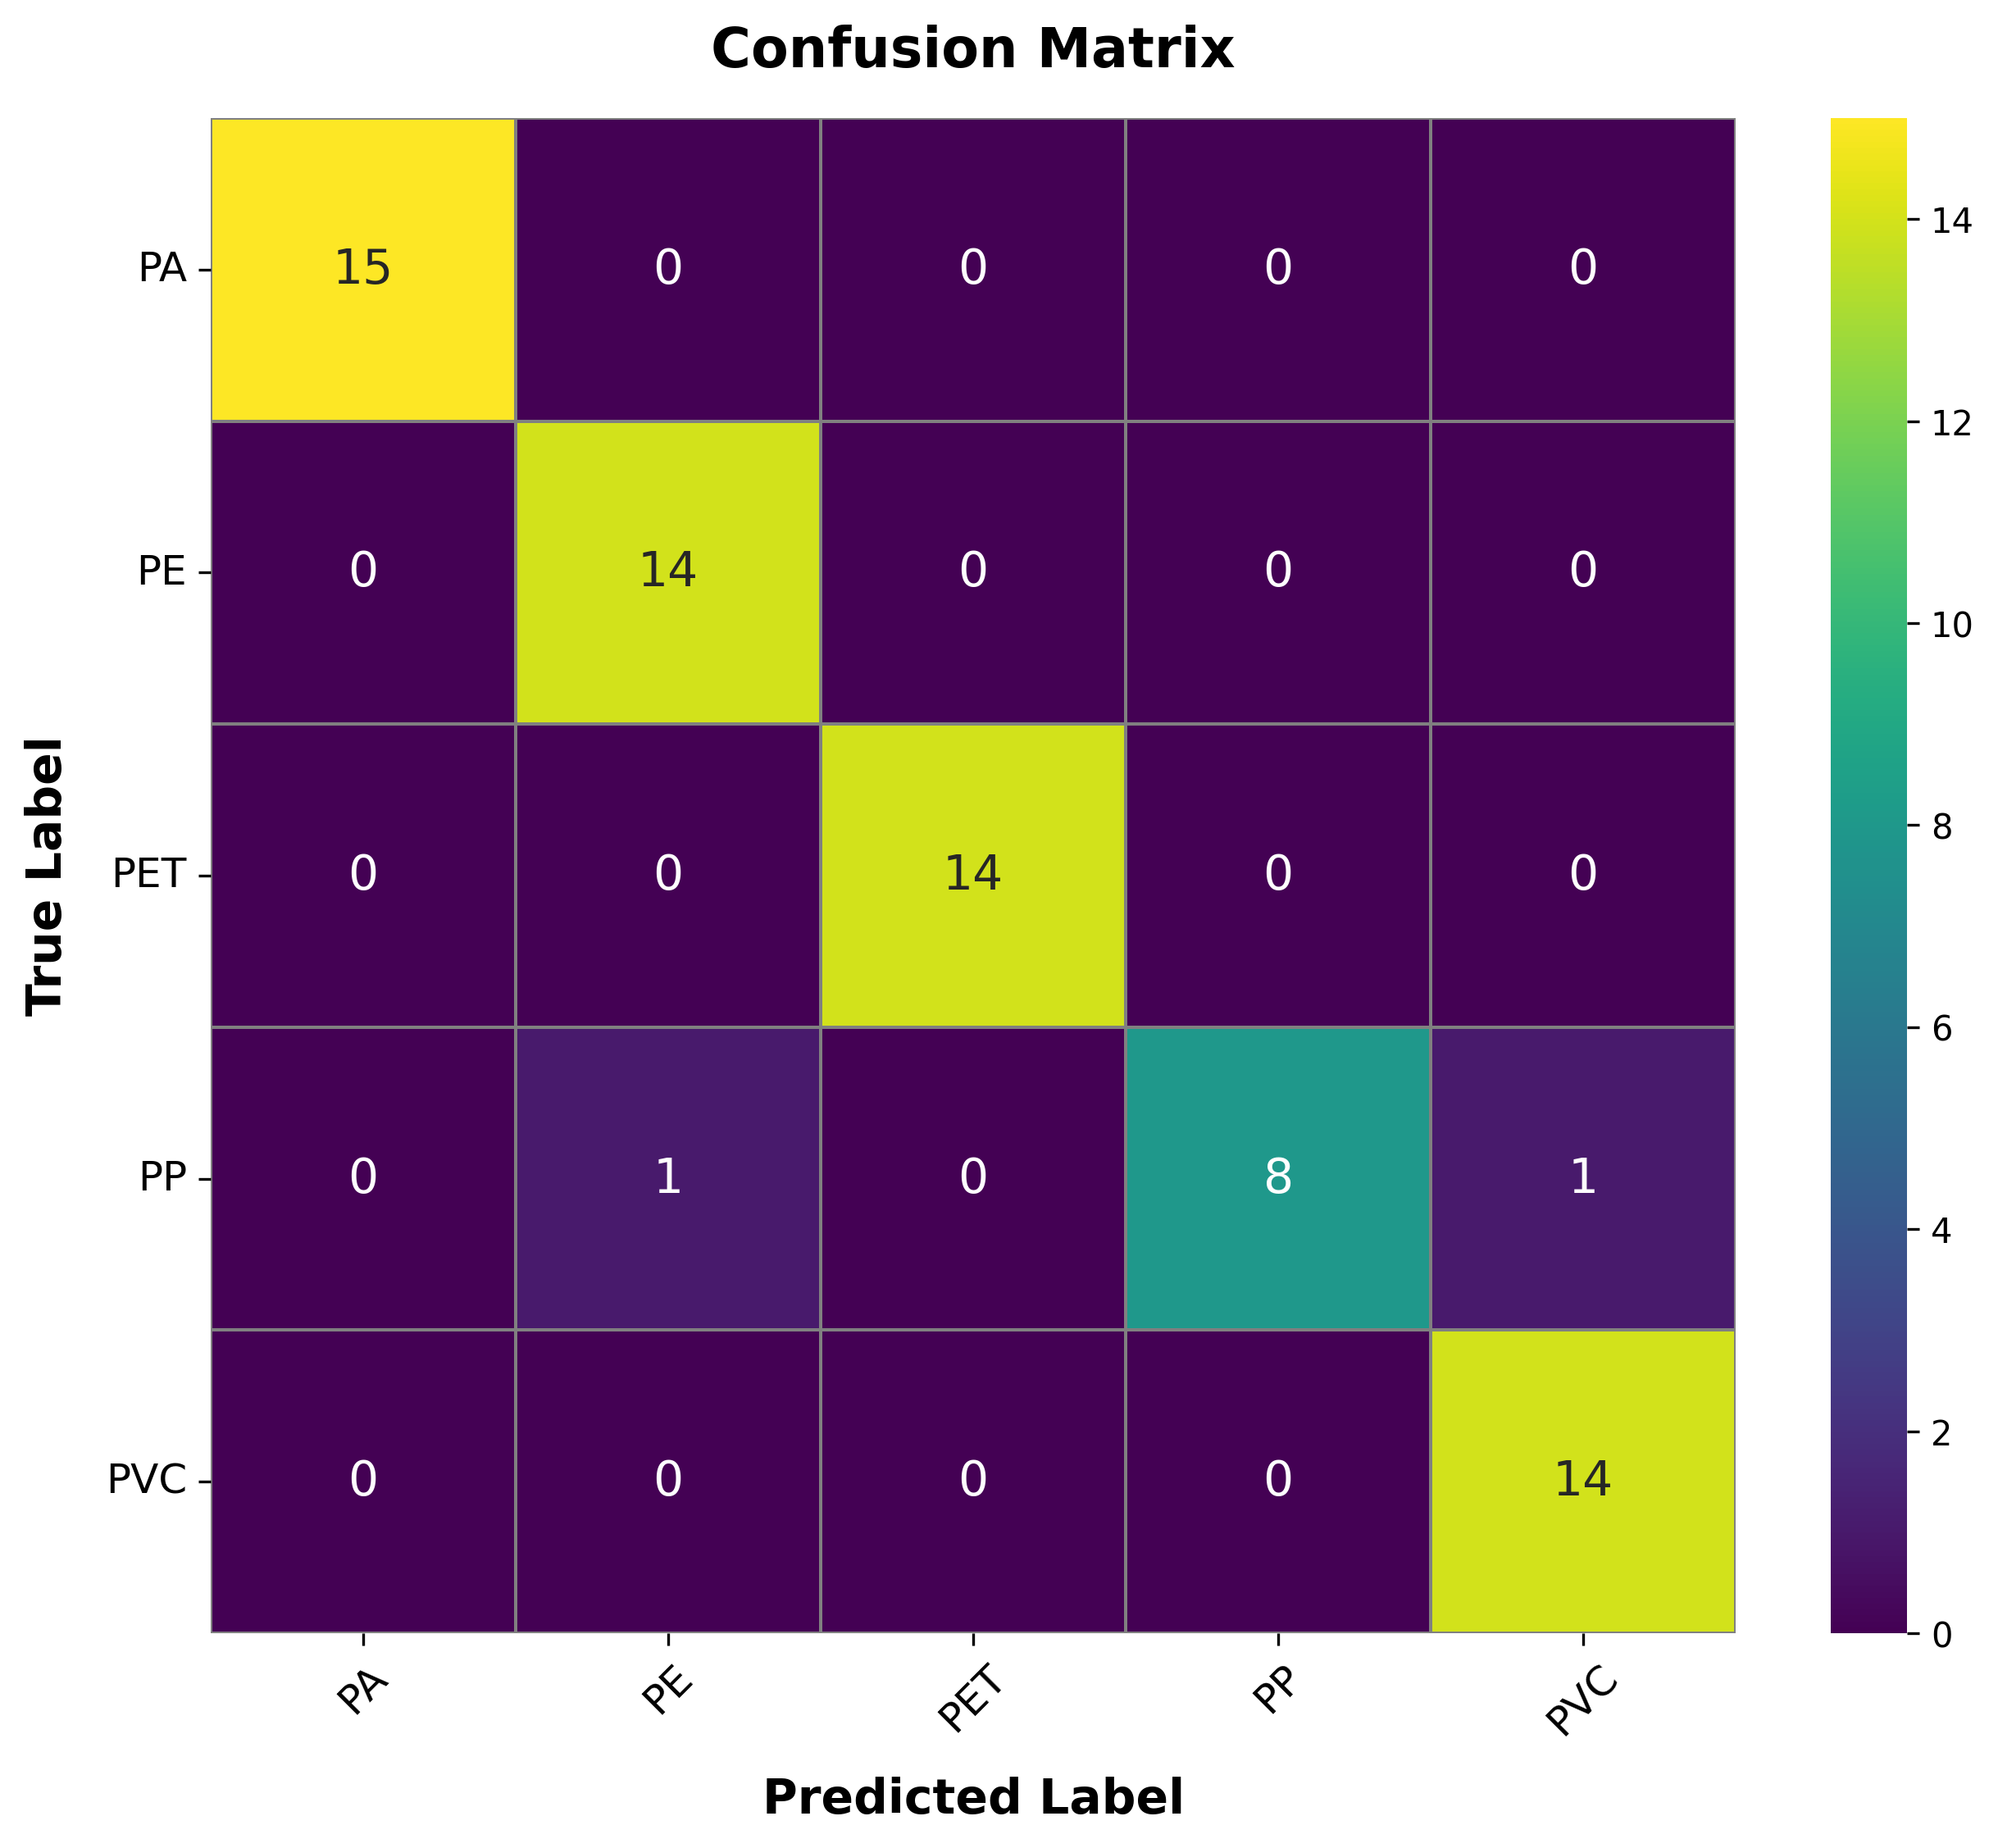

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted_labels_test.numpy())

# Define class labels from encoder
class_labels = encoder.classes_

# Create a high-resolution figure
plt.figure(figsize=(10, 8), dpi=300)

# Plot Confusion Matrix with enhanced styling
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis",
            xticklabels=class_labels, yticklabels=class_labels,
            linewidths=0.5, linecolor="gray", cbar=True, annot_kws={"size": 14})

# Add Labels and Title with Improved Font Styling
plt.xlabel("Predicted Label", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("True Label", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Confusion Matrix", fontsize=16, fontweight="bold", pad=15)

# Customize tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.show()


In [116]:
# # --- TRAINING vs LOSS ---
# plt.figure(figsize=(10, 8))
# plt.plot(loss_values, label="Training Loss", color="red")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training Loss Curve")
# plt.legend()
# plt.show()

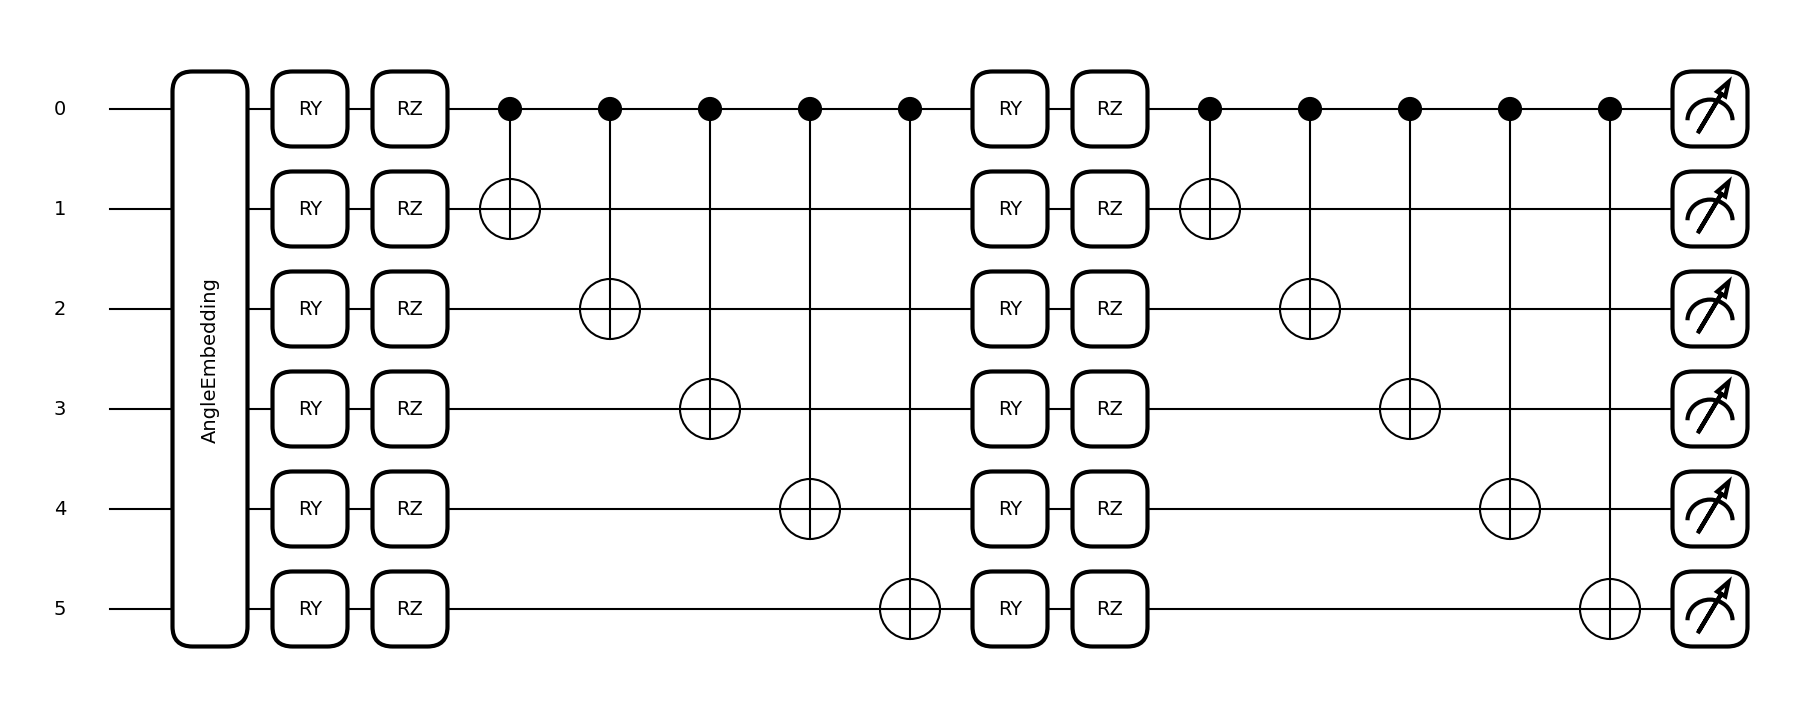

In [92]:
# --- QUANTUM CIRCUIT DIAGRAM (Graphical) ---
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(quantum_circuit)(torch.rand(num_qubits), model.q_weights.detach().numpy())
plt.show()


In [115]:
# # Ensure model is in evaluation mode
# model.eval()

# # Compute validation loss on test set
# with torch.no_grad():
#     y_val_pred = model(X_test)
#     val_loss_values = [loss_fn(y_val_pred, y_test).item()] * len(loss_values)  # Repeat same loss for all epochs

# # Now, plot the graph
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))

# # Plot Training Loss
# plt.plot(loss_values, label="Training Loss", color="red", linewidth=2)

# # Plot Estimated Validation Loss
# plt.plot(val_loss_values, label="Estimated Validation Loss", color="blue", linestyle="dashed", linewidth=2)

# # Labels & Title
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Estimated Validation Loss vs. Epochs")

# # Add legend and grid
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.6)

# plt.show()


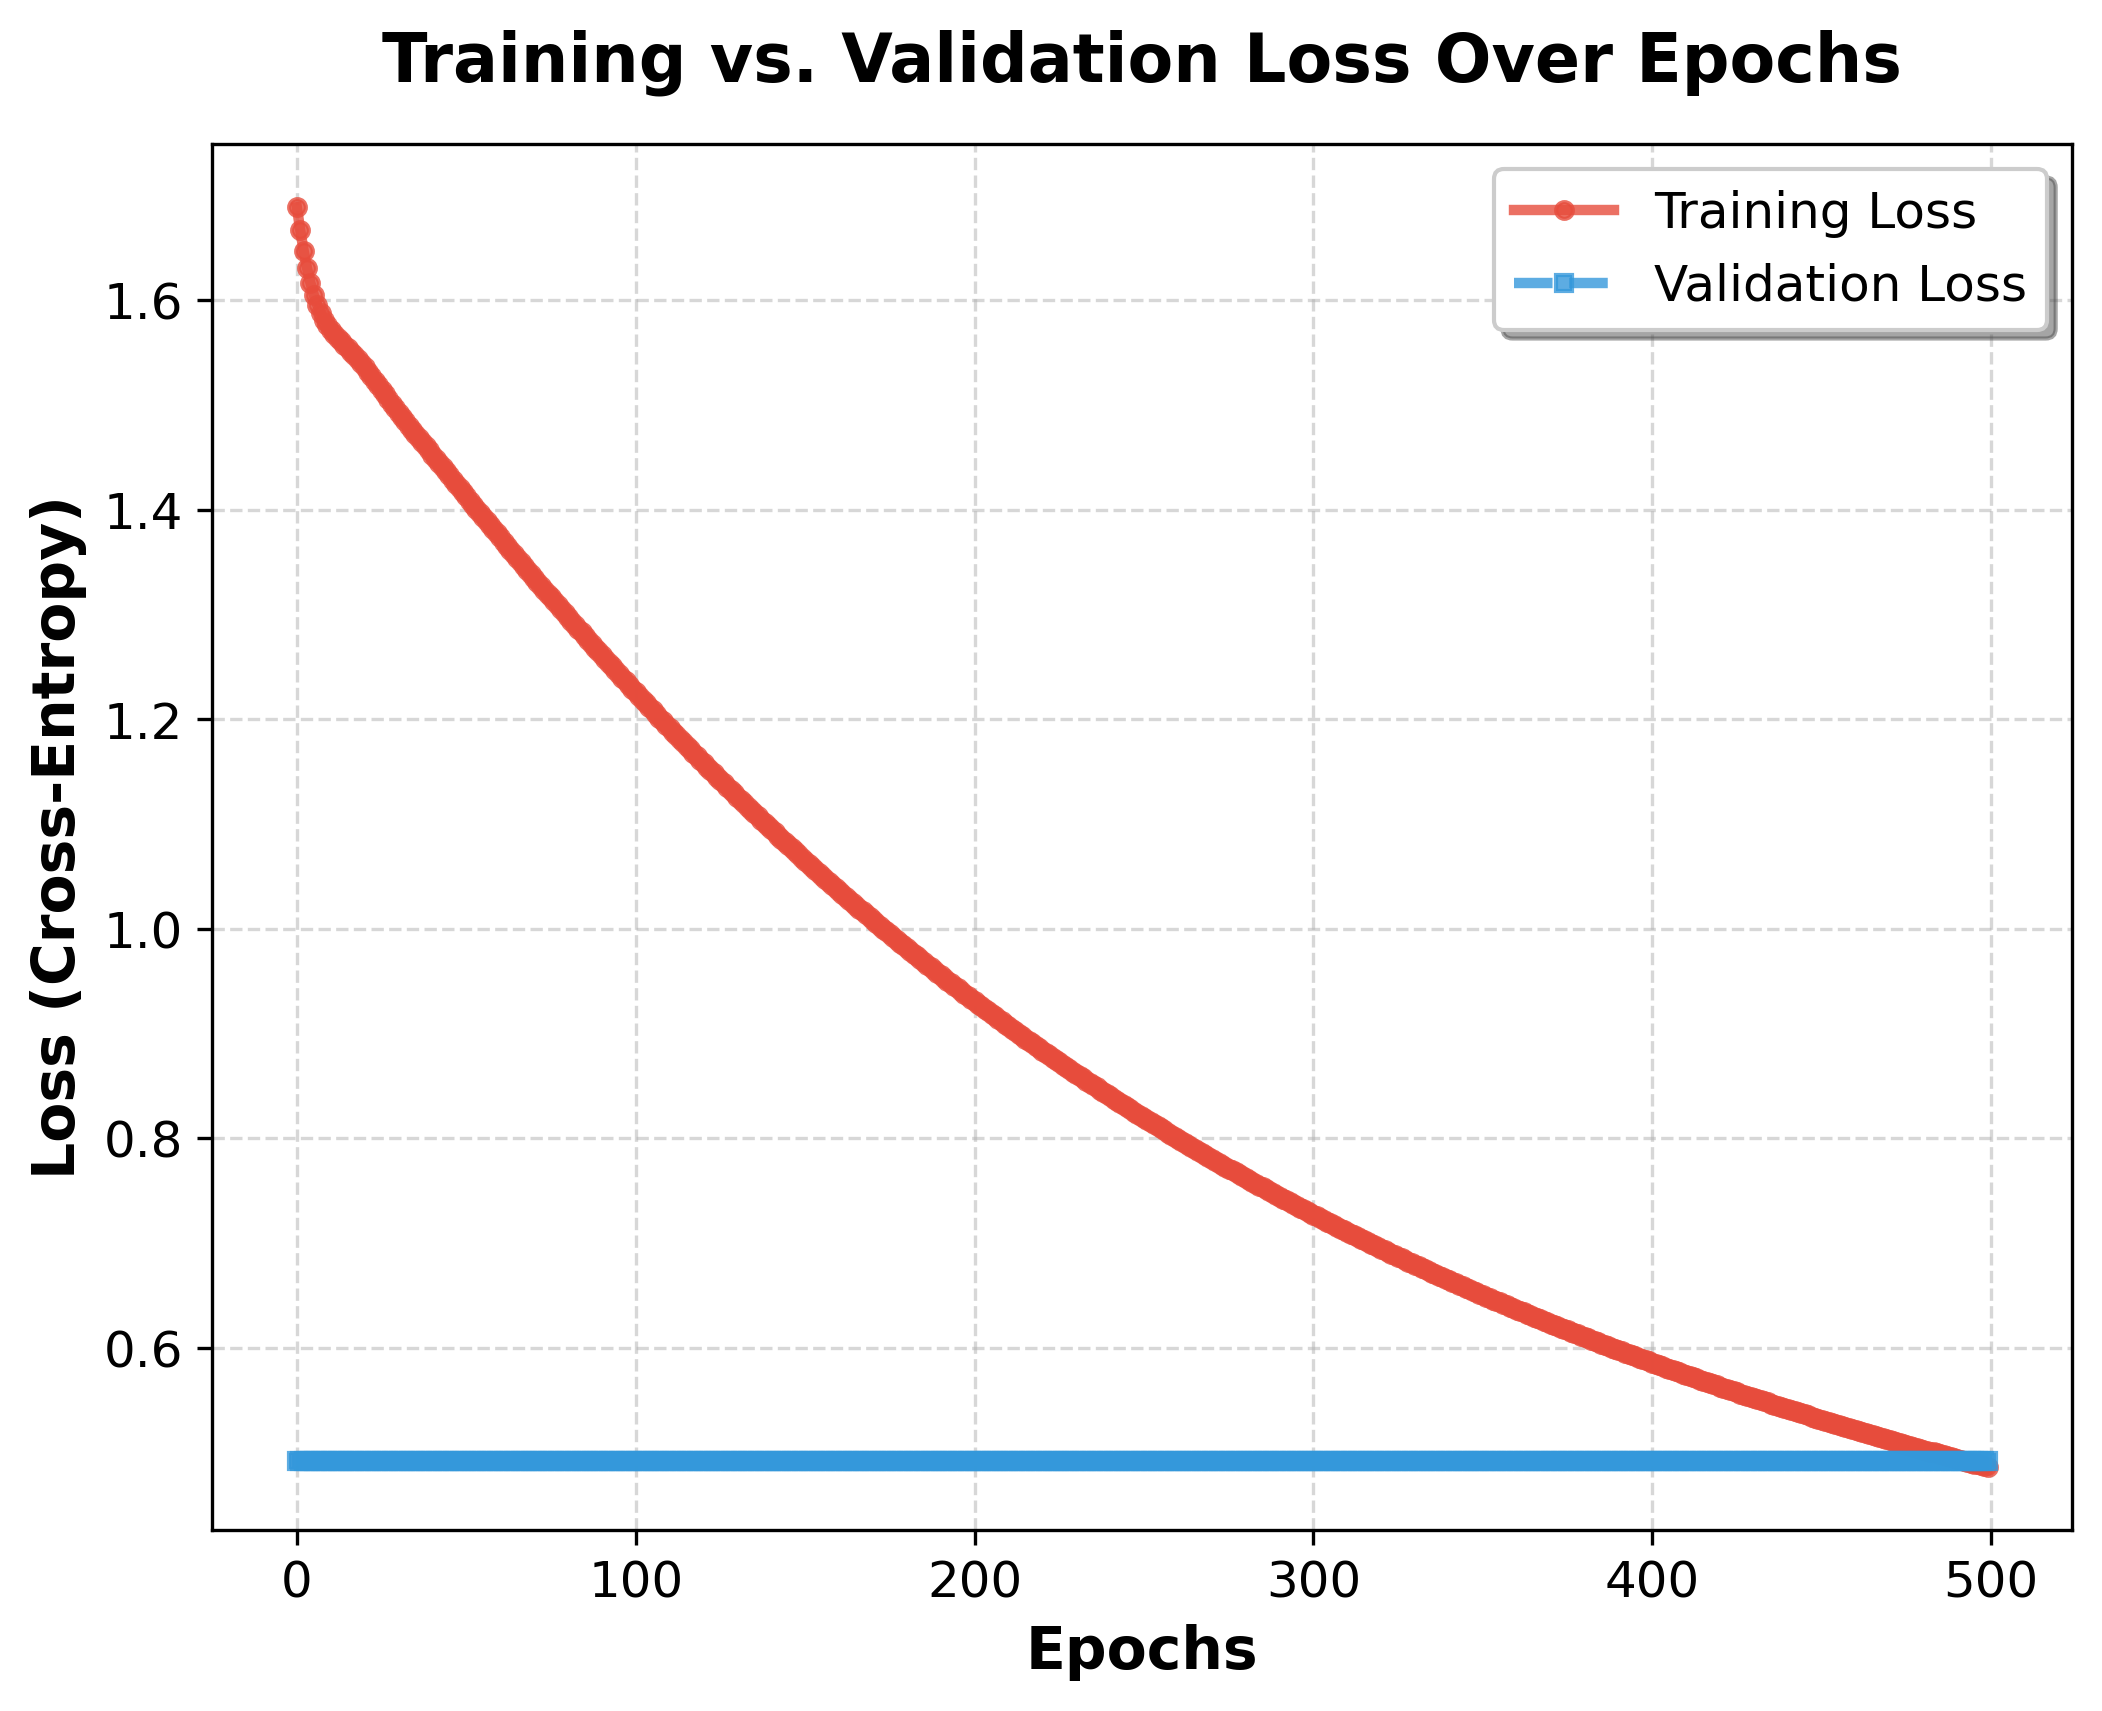

In [113]:
import matplotlib.pyplot as plt

# Create the figure with high resolution for publication
plt.figure(figsize=(8, 6), dpi=300)

# Plot Training Loss with smoother line
plt.plot(loss_values, label="Training Loss", color="#E74C3C", linewidth=2.5, marker="o", markersize=4, alpha=0.8)

# Plot Estimated Validation Loss with dashed line
plt.plot(val_loss_values, label="Validation Loss", color="#3498DB", linestyle="--", linewidth=2.5, marker="s", markersize=4, alpha=0.8)

# Set labels with LaTeX-like formatting
plt.xlabel("Epochs", fontsize=14, fontweight="bold")
plt.ylabel("Loss (Cross-Entropy)", fontsize=14, fontweight="bold")

# Set title with larger font
plt.title("Training vs. Validation Loss Over Epochs", fontsize=16, fontweight="bold", pad=15)

# Customize axes ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid with better styling
plt.grid(True, linestyle="--", alpha=0.5)

# Add a legend with improved visibility
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True, fancybox=True)

# Show the plot
plt.show()


In [108]:
print(f"Number of shots used: {dev.shots}")

Number of shots used: Shots(total=None)


In [93]:
# --- MODEL WEIGHTS ---
print("\nModel Weights:")
print(model.q_weights.detach().numpy())



Model Weights:
[[ 0.00350772 -0.00840768 -0.00623197  0.00063737  0.00617065 -0.00439512]
 [ 0.01330946  0.02199537  0.00796091 -0.00161625 -0.00248144 -0.01554777]]


In [135]:
# Save the trained model weights
model_path = "/content/quantum_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model weights saved to {model_path}")

Model weights saved to /content/quantum_model.pth


In [136]:
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [137]:
# checkpoint = {
#     "epoch": epochs,  # Last epoch number
#     "model_state": model.state_dict(),  # Model weights
#     "optimizer_state": optimizer.state_dict(),  # Optimizer state
# }

# torch.save(checkpoint, "quantum_model_deepSave.pth")  # Save everything
# print("Quantum model saved successfully!")


In [138]:
checkpoint = {
    "epoch": epochs,  # Last epoch number
    "model_state": model.state_dict(),  # Model weights
    "optimizer_state": optimizer.state_dict(),  # Optimizer state
    "loss_values": loss_values,  # Save loss history
    "accuracy_values": accuracy_values,  # Save accuracy history
}

torch.save(checkpoint, "quantum_model_deepSave.pth")  # Save all in one file
print("✅ Quantum model & training history saved successfully!")


✅ Quantum model & training history saved successfully!


In [140]:
import torch

checkpoint = {
    "epoch": epochs,  # Last epoch number
    "model_class": model.__class__.__name__,  # Save model class name
    "model_state": model.state_dict(),  # Model weights
    "optimizer_state": optimizer.state_dict(),  # Optimizer state
    # "scheduler_state": scheduler.state_dict() if scheduler else None,  # LR scheduler (optional)
    "loss_values": loss_values,  # Loss history
    "accuracy_values": accuracy_values,  # Accuracy history
    "gradient_norms": [p.grad.norm().item() for p in model.parameters() if p.grad is not None],  # Gradients (optional)
    "hyperparameters": {
        "learning_rate": optimizer.param_groups[0]["lr"],
        "batch_size": batch_size,
        "num_epochs": epochs,
        "architecture": str(model),
    },  # Store hyperparameters
}

torch.save(checkpoint, "quantum_model_full_save.pth")  # Save all in one file
print("✅ Full model, training history, and hyperparameters saved successfully!")


✅ Full model, training history, and hyperparameters saved successfully!


## usage

In [145]:
import torch
from tabulate import tabulate

# Load checkpoint
checkpoint = torch.load("quantum_model_deepSave.pth")

# Load model and set to evaluation mode
model = QuantumClassifier()
model.load_state_dict(checkpoint["model_state"])
model.eval()

# Extract training history
loss_values = checkpoint["loss_values"]
accuracy_values = checkpoint["accuracy_values"]
epochs = checkpoint["epoch"]

# Prepare data for tabular display (Epoch starts from 1 instead of 0)
table_data = [[epoch + 1, f"{loss_values[epoch]:.4f}", f"{accuracy_values[epoch]:.2f}%"]
              for epoch in range(len(loss_values))]

# Print formatted table
print("\n📌 Training Progress Overview:\n")
print(tabulate(table_data, headers=["Epoch", "Loss", "Accuracy"], tablefmt="grid"))

# Save to file for publication (Optional)
with open("training_log.txt", "w") as f:
    f.write(tabulate(table_data, headers=["Epoch", "Loss", "Accuracy"], tablefmt="grid"))

print("\n✅ Training log saved as 'training_log.txt' for publication!")



📌 Training Progress Overview:

+---------+--------+------------+
|   Epoch |   Loss | Accuracy   |
+=========+========+============+
|       1 | 1.6886 | 15.30%     |
+---------+--------+------------+
|       2 | 1.6665 | 15.30%     |
+---------+--------+------------+
|       3 | 1.6471 | 15.30%     |
+---------+--------+------------+
|       4 | 1.6305 | 15.30%     |
+---------+--------+------------+
|       5 | 1.6164 | 11.94%     |
+---------+--------+------------+
|       6 | 1.6047 | 20.15%     |
+---------+--------+------------+
|       7 | 1.5951 | 21.64%     |
+---------+--------+------------+
|       8 | 1.5873 | 21.64%     |
+---------+--------+------------+
|       9 | 1.581  | 21.64%     |
+---------+--------+------------+
|      10 | 1.5757 | 21.64%     |
+---------+--------+------------+
|      11 | 1.5713 | 21.64%     |
+---------+--------+------------+
|      12 | 1.5674 | 21.64%     |
+---------+--------+------------+
|      13 | 1.5639 | 21.64%     |
+---------+-----

<ipython-input-145-06af03fe6602>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("quantum_model_deepSave.pth")
